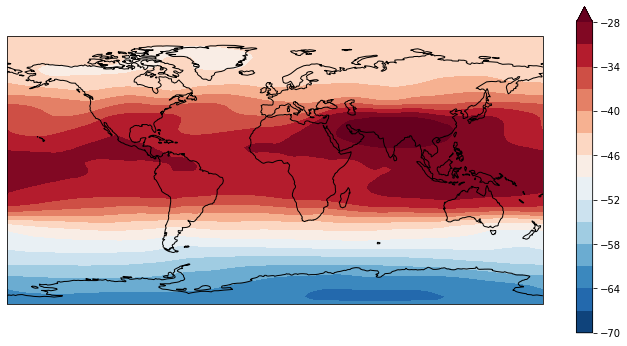

In [15]:
#####https://geoclimatologyblog.wordpress.com/2020/03/27/seasonal-averages-of-surface-air-of-the-temperature-ncep-ncar-reanalysis-data-files-using-python/
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
# Important to change the longitude from 0º to 360 to -180º to 180
from cartopy.util import add_cyclic_point


access_pr_file = '/mnt/c/Users/Carla/Desktop/yycompos._wr_wm2RMh.nc'

dset = xr.open_dataset(access_pr_file)
dset_by_season = dset['air'].groupby('time.season').mean('time')

#using the groupby method
tmp_range = (dset_by_season.sel(season='JJA'))
lat = dset.variables['lat'][:]
lon = dset.variables['lon'][:]

# Change the longitude from 0º to 360 to -180º to 180
air_cyc, lon_cyc = add_cyclic_point(tmp_range, coord=lon)

fig=plt.figure(figsize=[12,6])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
extent = [-180, 180, -90, 90]
ax.set_extent(extent)

mm = ax.contourf(lon_cyc,
                 lat,
                 air_cyc,
                 levels=np.arange(-70, -25, 3),
                 extend='max',
                 transform=ccrs.PlateCarree(),
                 cmap='RdBu_r')
fig.colorbar(mm, ax=ax, orientation='vertical')
ax.coastlines()
plt.show()


In [4]:
dset.variables

Frozen({'lat': <xarray.IndexVariable 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Attributes:
    units:         degrees_north
    actual_range:  [ 90. -90.]
    long_name:     Latitude, 'lon': <xarray.IndexVariable 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  

In [7]:
dset['air'].groupby('time.season').mean('time')

<xarray.DataArray 'air' (season: 1, lat: 73, lon: 144)>
array([[[-43.877556, -43.877556, -43.877556, ..., -43.877556,
         -43.877556, -43.877556],
        [-44.1411  , -44.12275 , -44.10468 , ..., -44.19857 ,
         -44.179432, -44.160934],
        [-44.493206, -44.451965, -44.412155, ..., -44.629314,
         -44.582092, -44.536762],
        ...,
        [-63.378418, -63.461525, -63.544983, ..., -63.13568 ,
         -63.214867, -63.2966  ],
        [-63.627396, -63.66841 , -63.708427, ..., -63.506676,
         -63.547142, -63.58706 ],
        [-63.500595, -63.500595, -63.500595, ..., -63.500595,
         -63.500595, -63.500595]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * season   (season) object 'JJA'

In [8]:
dset['air']

<xarray.DataArray 'air' (time: 1, lat: 73, lon: 144)>
array([[[-43.877556, -43.877556, ..., -43.877556, -43.877556],
        [-44.1411  , -44.12275 , ..., -44.179432, -44.160934],
        ...,
        [-63.627396, -63.66841 , ..., -63.547142, -63.58706 ],
        [-63.500595, -63.500595, ..., -63.500595, -63.500595]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1985-08-01
Attributes:
    long_name:     Air Temperature
    valid_range:   [-99999.  99999.]
    actual_range:  [-64.70628 377.2    ]
    units:         degC
    precision:     99
    var_desc:      Air Temperature
    dataset:       CDC Derived NCEP Reanalysis Products
    level_desc:     300mb Pressure Level
    statistic:     Composite
    parent_stat:   Other